# Importantando bases

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Carregando base e escolhendo colunas

In [66]:
dados = pd.read_excel('dados_possiveis_usuarios_c_label_2_clusters.xlsx')
dados = dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome', 'Hora da última modificação', 'Cluster', 'Usaria o scan?', 'Usaria o guia?', 'Com qual gênero você se identifica?', 'De que forma você costuma buscar essas informações?'])
dados

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Menos de 18 anos,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não,Sim
1,Entre 25 e 35 anos,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,Sim
3,Menos de 18 anos,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,Sim
4,Entre 46 e 59 anos,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,Entre 25 e 35 anos,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Pintura,Raramente (uma vez ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim,Sim
236,Entre 46 e 59 anos,Ensino superior concluído,Classe A: superior a R$ 22 mil,De 5 a 9 anos,Arquitetura e Urbanismo,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Com um guia do próprio museu.,Sim,Aprendizado,"Sim, sinto falta de mais informações","Sim, procuro",Sim,Sim
237,Entre 25 e 35 anos,Ensino superior concluído,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Há mais de 10 anos,Arte digital,Frequentemente (máximo cinco vezes ao ano),Sim,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro",Sim,Sim
238,Entre 25 e 35 anos,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Menos de 2 anos,Fotografia,Ocasionalmente (máximo três vezes ao ano),Não,Sim,"Utilizo o planejamento de terceiros (sites, bl...",Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,Sim


In [67]:
df_y, df_x = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro",Não
1,Entre 25 e 35 anos,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN
3,Menos de 18 anos,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN
4,Entre 46 e 59 anos,Ensino superior concluído,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN


0    Sim
1    Não
2    Sim
3    Sim
4    Sim
Name: Usaria o aplicativo?, dtype: object

# Modelo Cru

## Tratando dataframe

In [68]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

dict_label_encoder = {}

for i in df_x:
    le_x = LabelEncoder()
    df_x[i] = le_x.fit_transform(df_x[i])
    dict_label_encoder[i] = le_x

le_y = LabelEncoder()

df_y = le_y.fit_transform(df_y)

display(df_x.head())
display(df_y)

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
0,5,1,3,4,4,4,0,1,2,0,3,1,1,0
1,2,5,2,5,6,5,2,2,4,2,5,2,2,2
2,5,1,2,0,3,3,1,1,2,0,1,0,2,2
3,5,1,1,2,5,3,0,1,2,0,3,1,0,2
4,4,5,0,3,4,1,1,0,1,1,2,1,0,2


array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [69]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.20, random_state=SEED)

display(x_train)
display(y_train)
display(x_test)
display(y_test)

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
139,5,1,2,2,4,4,1,1,2,0,2,1,1,1
60,4,5,0,3,5,1,0,1,1,0,3,0,2,2
204,3,5,3,3,3,3,1,1,1,0,1,1,1,0
186,3,5,2,5,6,5,2,2,4,2,5,2,2,2
207,0,5,1,3,5,4,0,1,3,0,1,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,5,2,3,4,4,1,1,0,0,2,1,1,0
14,5,0,1,1,5,3,0,1,2,0,3,1,1,0
92,2,5,2,3,2,4,0,1,2,0,3,1,1,1
179,3,5,0,3,4,3,1,1,0,1,3,1,0,2


array([1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1])

,Em qual faixa etária você se encaixa?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,Você encontra o que precisa/esperava ao pesquisar?
24,5,1,1,4,4,3,1,1,2,0,3,1,1,1
6,3,5,0,5,6,5,2,2,4,2,5,2,2,2
93,5,1,0,0,1,0,1,1,2,0,2,0,2,2
109,5,1,1,5,6,5,2,2,4,2,5,2,2,2
104,5,1,2,2,4,4,1,0,3,0,0,0,2,2
172,5,0,3,1,2,2,0,1,3,0,2,1,0,2
233,4,5,0,3,4,3,0,1,3,0,1,0,2,2
86,5,1,1,5,6,5,2,2,4,2,5,2,2,2
9,5,1,2,4,3,4,0,1,2,0,2,1,0,2
143,5,1,2,5,6,5,2,2,4,2,5,2,2,2


array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [70]:
colunas_modelo = df_x.columns

## Naive Bayes

### Modelo

In [71]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicao_gnb = gnb.fit(x_train, y_train).predict(x_test)

probabilidades_naive_bayes = list(gnb.predict_proba(x_test))
# for j, i in enumerate(probabilidades_naive_bayes): probabilidades_naive_bayes[j] = np.round(probabilidades_naive_bayes[j] *100, 2)
for j, i in enumerate(probabilidades_naive_bayes):
    probabilidades_naive_bayes[j] = list(i)
print(probabilidades_naive_bayes)
display(predicao_gnb)

[[0.0, 1.0], [1.0, 1.2400618448070379e-20], [1.4732371073368402e-11, 0.9999999999852669], [1.0, 8.547413449699593e-21], [0.0038270705509631246, 0.9961729294490358], [1.11028461676215e-19, 1.0], [0.001330499108590428, 0.9986695008914092], [1.0, 8.547413449699593e-21], [9.110953435035165e-16, 1.0], [1.0, 8.828846232515278e-21], [1.0, 7.664110529245796e-21], [0.029674117652627664, 0.9703258823473735], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [1.226526562450118e-15, 0.9999999999999982], [1.0, 8.828846232515278e-21], [1.0, 1.332897504722046e-20], [0.6038195077240378, 0.39618049227596175], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [0.0, 1.0], [3.334785441378552e-17, 1.0], [0.0, 1.0], [0.006002507582160114, 0.9939974924178414], [1.0, 1.804926816770347e-20], [0.0, 1.0], [0.0, 1.0], [1.0, 8.547413449699593e-21], [0.0, 1.0], [1.0, 7.664110529245796e-21], [0.0, 1.0], [1.0, 6.2577364899584276e-21], [0.9600611350608217, 0.039938864939178885], [0.057324069779444375, 0.9426759302205554], [0.0, 1.0],

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

### Avaliando modelo

In [72]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_gnb, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.93      0.93      0.93        15
         Sim       0.97      0.97      0.97        33

    accuracy                           0.96        48
   macro avg       0.95      0.95      0.95        48
weighted avg       0.96      0.96      0.96        48



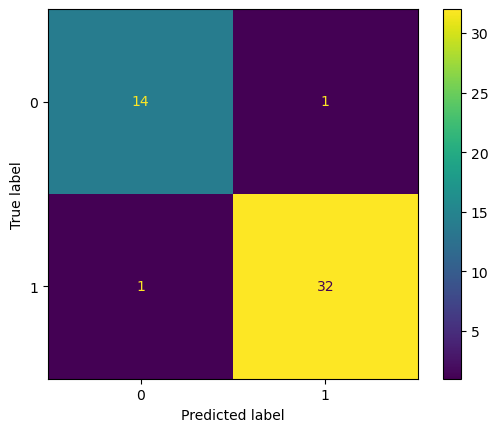

In [73]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_gnb)).plot()

## Regressão linear

### Modelo

In [74]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

predicao_lr = lr.fit(x_train, y_train).predict(x_test)

probabilidades_linear_regression = list(lr.predict_proba(x_test))

for j, i in enumerate(probabilidades_naive_bayes):
    probabilidades_naive_bayes[j] = list(i)

print(probabilidades_linear_regression)
display(predicao_lr)

[array([0.04275425, 0.95724575]), array([0.9903975, 0.0096025]), array([0.03105597, 0.96894403]), array([0.99651753, 0.00348247]), array([0.08048797, 0.91951203]), array([0.00859206, 0.99140794]), array([0.02858145, 0.97141855]), array([0.99651753, 0.00348247]), array([0.03413928, 0.96586072]), array([0.99706745, 0.00293255]), array([0.99722779, 0.00277221]), array([0.0272259, 0.9727741]), array([0.02241254, 0.97758746]), array([0.43035003, 0.56964997]), array([7.44205628e-05, 9.99925579e-01]), array([0.0965224, 0.9034776]), array([0.01719538, 0.98280462]), array([0.99706745, 0.00293255]), array([0.99405792, 0.00594208]), array([0.52136028, 0.47863972]), array([0.16233748, 0.83766252]), array([0.00270888, 0.99729112]), array([0.00567332, 0.99432668]), array([0.06806471, 0.93193529]), array([0.01177802, 0.98822198]), array([0.00329678, 0.99670322]), array([0.50077331, 0.49922669]), array([0.99071195, 0.00928805]), array([6.58512840e-04, 9.99341487e-01]), array([0.02556101, 0.97443899]),

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

### Avaliando  modelo

In [75]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_lr, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.88      1.00      0.94        15
         Sim       1.00      0.94      0.97        33

    accuracy                           0.96        48
   macro avg       0.94      0.97      0.95        48
weighted avg       0.96      0.96      0.96        48



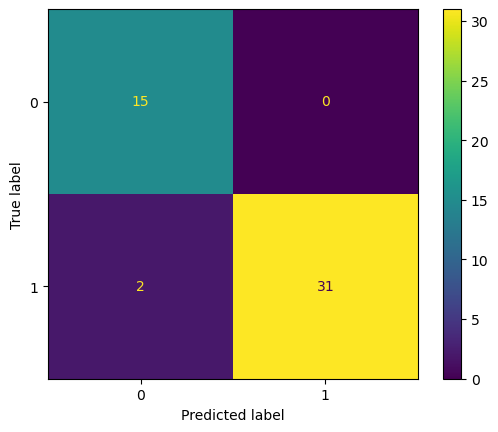

In [76]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_lr)).plot()

## Arvore de decisão

### Modelo

In [77]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
predicao_dtc = dtc.fit(x_train, y_train).predict(x_test)

display(predicao_dtc)

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1])

### Avaliando modelo

In [78]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_dtc, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.83      1.00      0.91        15
         Sim       1.00      0.91      0.95        33

    accuracy                           0.94        48
   macro avg       0.92      0.95      0.93        48
weighted avg       0.95      0.94      0.94        48



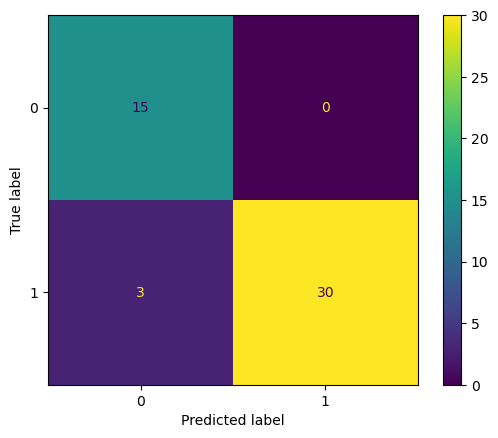

In [79]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_dtc)).plot()

### Visualizando modelo

[Text(0.6363636363636364, 0.9285714285714286, 'Você sente falta de mais informações sobre as obras nos museus? <= 1.5\ngini = 0.451\nsamples = 192\nvalue = [66, 126]\nclass = 1'),
 Text(0.5454545454545454, 0.7857142857142857, 'Você sente falta de mais informações sobre as obras nos museus? <= 0.5\ngini = 0.136\nsamples = 136\nvalue = [10, 126]\nclass = 1'),
 Text(0.2727272727272727, 0.6428571428571429, 'O que mais te atrai em visitar museus ou exposições de arte? <= 2.5\ngini = 0.404\nsamples = 32\nvalue = [9, 23]\nclass = 1'),
 Text(0.18181818181818182, 0.5, 'gini = 0.0\nsamples = 17\nvalue = [0, 17]\nclass = 1'),
 Text(0.36363636363636365, 0.5, 'Com que frequência você vai aos museus? <= 3.5\ngini = 0.48\nsamples = 15\nvalue = [9, 6]\nclass = 0'),
 Text(0.2727272727272727, 0.35714285714285715, 'Qual seu nível de formação atual? <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]\nclass = 1'),
 Text(0.18181818181818182, 0.21428571428571427, 'Qual das opções de arte abaixo você mais gost

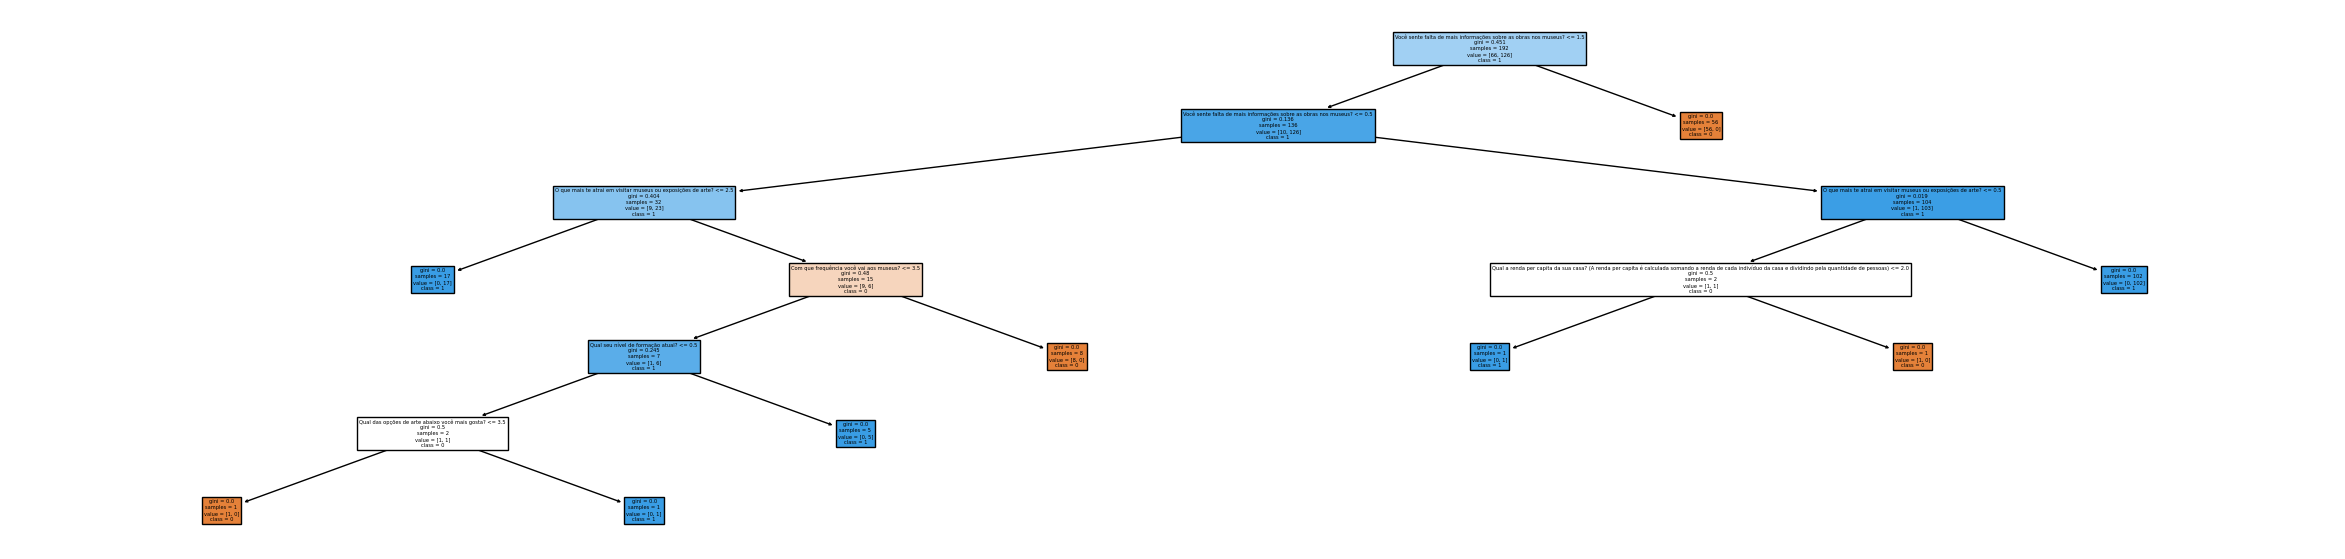

In [80]:
from sklearn import tree

plt.figure(figsize=(30,7))
classes = [str(x) for x in dtc.classes_]

tree.plot_tree(dtc, 
               feature_names=list(df_x.columns), 
               class_names=classes, filled=True)

In [81]:
dados.columns

Index(['Em qual faixa etária você se encaixa?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
       'Você sente falta de mais informações sobre as obras nos museus?',
       'Você procura saber sobre essas informações faltantes?',
       'Voc

In [82]:
for i in dados:
    print(dados[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      125
Entre 25 e 35 anos     34
Entre 46 e 59 anos     26
Entre 18 e 24 anos     23
Entre 36 e 45 anos     20
60+ anos               12
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  80
Cursando ensino médio                      69
Cursando ensino fundamental                59
Cursando ensino superior                   14
Ensino superior incompleto/não iniciado    13
Ensino fundamental incompleto               4
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    101
Classe B: entre R$ 7,1 mil e R$ 22 mil      83
Classes D/E: até R$ 2,9 mil                 28
Classe A: superior a R$ 22 mil              28
Name: count, dtype: int64
Há quanto tempo você se interessa

In [83]:
usuario = dados.loc[dados['Usaria o aplicativo?'] == 'Sim']
for i in usuario:
    print(usuario[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      79
Entre 25 e 35 anos    26
Entre 46 e 59 anos    19
Entre 18 e 24 anos    13
60+ anos              11
Entre 36 e 45 anos    11
Name: count, dtype: int64
Qual seu nível de formação atual?
Ensino superior concluído                  59
Cursando ensino médio                      50
Cursando ensino fundamental                31
Ensino superior incompleto/não iniciado     8
Cursando ensino superior                    6
Ensino fundamental incompleto               4
Ensino médio incompleto                     1
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    69
Classe B: entre R$ 7,1 mil e R$ 22 mil     53
Classes D/E: até R$ 2,9 mil                19
Classe A: superior a R$ 22 mil             18
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?

In [84]:
n_usuario = dados.loc[dados['Usaria o aplicativo?'] == 'Não']
for i in n_usuario:
    print(n_usuario[i].value_counts())
    print('=' * 30)

Em qual faixa etária você se encaixa?
Menos de 18 anos      46
Entre 18 e 24 anos    10
Entre 36 e 45 anos     9
Entre 25 e 35 anos     8
Entre 46 e 59 anos     7
60+ anos               1
Name: count, dtype: int64
Qual seu nível de formação atual?
Cursando ensino fundamental                28
Ensino superior concluído                  21
Cursando ensino médio                      19
Cursando ensino superior                    8
Ensino superior incompleto/não iniciado     5
Name: count, dtype: int64
Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)
Classe C: entre R$ 2,9 mil e R$ 7,1 mil    32
Classe B: entre R$ 7,1 mil e R$ 22 mil     30
Classe A: superior a R$ 22 mil             10
Classes D/E: até R$ 2,9 mil                 9
Name: count, dtype: int64
Há quanto tempo você se interessa por arte?
Não me interesso         64
Há mais de 10 anos        8
De 5 a 9 anos             3
Estou i

# Predizendo novos dados

In [95]:
new_data_og = pd.read_excel('Leontis.xlsx')

new_data = new_data_og[colunas_modelo]

for k, v in dict_label_encoder.items():
    new_data[k] = v.transform(new_data[k])

predict = dtc.predict(new_data)
new_data_og['Usaria o aplicativo?'] = predict
new_data_og.to_excel('leontis_possiveis_usuarios.xlsx')
new_data_og.head()

C:\Users\leticiapitta-ieg\AppData\Local\Temp\ipykernel_2708\3916846749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[k] = v.transform(new_data[k])
C:\Users\leticiapitta-ieg\AppData\Local\Temp\ipykernel_2708\3916846749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_data[k] = v.transform(new_data[k])
C:\Users\leticiapitta-ieg\AppData\Local\Temp\ipykernel_2708\3916846749.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),...,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,1
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,1
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,...,Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,1
